In [1]:
import matplotlib.pyplot as plt
import SimpleITK as sitk
import numpy as np  
import sigpy as sp
import sigpy.plot as pl
from sigpy.mri import radial
import sigpy.mri as mr

In [2]:
def show_image(image):
    plt.figure()
    plt.imshow(np.abs(image), cmap='gray')
    plt.show()


def show_kspace(kspace):
    plt.figure()
    plt.imshow(np.log(np.abs(kspace)), cmap='gray')
    plt.show()

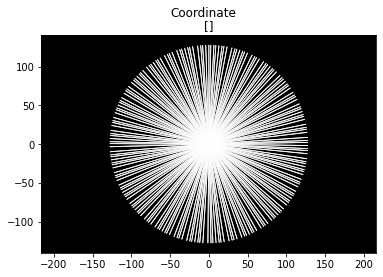

In [3]:
# Generate radical coordinate
coord = sp.mri.radial([200,256,2],[256,256])
coord.shape
pl.ScatterPlot(coord, title='Coordinate')

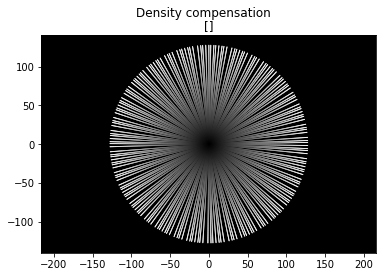

(200, 256)

In [4]:
# Create density compensation
dcf = (coord[..., 0]**2 + coord[..., 1]**2)**0.5
pl.ScatterPlot(coord, dcf, title='Density compensation')
dcf.shape

In [5]:
# Get image
sitk_t1 = sitk.ReadImage('t1.nii.gz') 
t1 = sitk.GetArrayFromImage(sitk_t1)
img = t1[1][0][45]

In [6]:
# NUFT to reconstruct img with density compensation
# apply non uniform fft to img according to radial coordinate
img = img.astype('float64')
ksp_nu = sp.nufft(img, coord)
img_recon = sp.nufft_adjoint(ksp_nu * dcf, coord, oshape=img.shape)

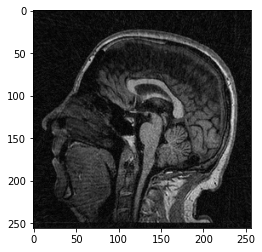

/opt/anaconda3/lib/python3.8/site-packages/skimage/metrics/_structural_similarity.py:199: ComplexWarning: Casting complex values to real discards the imaginary part
  im2 = im2.astype(float_type, copy=False)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:179: ComplexWarning: Casting complex values to real discards the imaginary part
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


PSNR = 18.126234856880842
SSIM = 0.5545473946447623
MSE = 1001.0525475181819
 


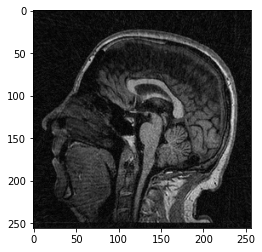

PSNR = 18.126234856880842
SSIM = 0.5545473946447623
MSE = 1001.0525475181819
 


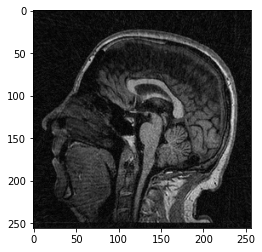

PSNR = 18.126234856880842
SSIM = 0.5545473946447623
MSE = 1001.0525475181819
 


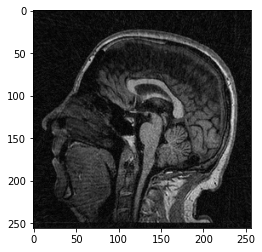

PSNR = 18.126234856880842
SSIM = 0.5545473946447623
MSE = 1001.0525475181819
 


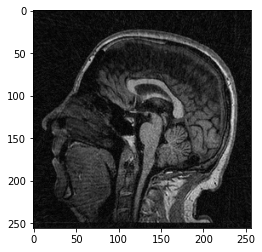

PSNR = 18.126234856880842
SSIM = 0.5545473946447623
MSE = 1001.0525475181819
 


In [7]:
## Test with different numbers of spikes
from quality_assess import evaluate
num = [50, 100, 150, 200, 250]
for i in num:
    coord_test = sp.mri.radial([i,256,2],[256,256])
    ksp_nu = sp.nufft(img, coord)
    img_recon = sp.nufft_adjoint(ksp_nu * dcf, coord, oshape=img.shape)
    show_image(img_recon)
    evaluate(img, img_recon)
